# logistic regression

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# 1. Input and process data
## 1.1. Load data

In [46]:
column_names = [
    "erythema", "scaling", "definite borders", "itching", "koebner phenomenon",
    "polygonal papules", "follicular papules", "oral mucosal involvement", "knee and elbow involvement",
    "scalp involvement", "family history", "melanin incontinence", "eosinophils in the infiltrate",
    "PNL infiltrate", "fibrosis of the papillary dermis", "exocytosis", "acanthosis",
    "hyperkeratosis", "parakeratosis", "clubbing of the rete ridges", "elongation of the rete ridges",
    "thinning of the suprapapillary epidermis", "spongiform pustule", "munro microabcess",
    "focal hypergranulosis", "disappearance of the granular layer", "vacuolisation and damage of basal layer",
    "spongiosis", "saw-tooth appearance of retes", "follicular horn plug", "perifollicular parakeratosis",
    "inflammatory monoluclear inflitrate", "band-like infiltrate", "Age", "class"
]

dermatology_data = pd.read_csv('dermatology/dermatology.data', header=None, names=column_names)

## 1.2. Preprocess data
- I will replace the missing values with the median value of the column.
- Also I found that the colum "perifollicular parakeratosis" has only one value, so I will drop it.
- Due to the logistic regression, I will delete class 6,5,4,2

In [47]:
dermatology_data.replace("?", pd.NA, inplace=True)
dermatology_data['Age'] = pd.to_numeric(dermatology_data['Age'], errors='coerce')

# Fill the missing values in 'Age' with the median age
age_median = dermatology_data['Age'].median()
dermatology_data['Age'].fillna(age_median, inplace=True)

# delete class 6,5,4,2
dermatology_data = dermatology_data[dermatology_data['class'] != 6]
dermatology_data = dermatology_data[dermatology_data['class'] != 5]
dermatology_data = dermatology_data[dermatology_data['class'] != 4]
dermatology_data = dermatology_data[dermatology_data['class'] != 2]

dermatology_data.drop('perifollicular parakeratosis', axis=1, inplace=True)

dermatology_data.replace(3, 0, inplace=True)

## 1.3. Scale data
- I will scale the data using the min-max scaler.

In [48]:
dermatology_data_scaled = dermatology_data.copy()
for column in dermatology_data.columns[:-1]:  # Exclude the class label for scaling
    col_min = dermatology_data[column].min()
    col_max = dermatology_data[column].max()
    dermatology_data_scaled[column] = (dermatology_data[column] - col_min) / (col_max - col_min)

# 1.4. Split data
- I will split the data into training and testing sets.

In [49]:
X = dermatology_data_scaled.drop('class', axis=1).values
y = dermatology_data_scaled['class'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 2. Logistic Regression
- I will implement the logistic regression algorithm using gradient descent.
- I will use the sigmoid function as the activation function.

In [50]:
class LogisticRegressionModel:
    def __init__(self, learning_rate, num_iterations):
        self.learning_rate = learning_rate
        self.num_iterations = num_iterations
        self.theta = None
        self.cost_history = []

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def compute_cost(self, X, y):
        m = len(y)
        h = self.sigmoid(np.dot(X, self.theta))
        epsilon = 1e-5  # Adding epsilon to avoid log(0)
        cost = (-1/m) * np.sum(y * np.log(h + epsilon) + (1 - y) * np.log(1 - h + epsilon))
        return cost

    def compute_gradient(self, X, y):
        m = len(y)
        h = self.sigmoid(np.dot(X, self.theta))
        gradient = np.dot(X.T, (h - y)) / m
        return gradient

    def fit(self, X, y):
        self.theta = np.zeros(X.shape[1])
        for i in range(self.num_iterations):
            gradient = self.compute_gradient(X, y)
            self.theta -= self.learning_rate * gradient
            cost = self.compute_cost(X, y)
            self.cost_history.append(cost)
            if i % 1000 == 0:
                print(f"Iteration {i+1}/{self.num_iterations} - Cost: {cost}")

    def predict_prob(self, X):
        return self.sigmoid(np.dot(X, self.theta))

    def predict(self, X):
        return [1 if x >= 0.5 else 0 for x in self.predict_prob(X)]

    def get_cost_history(self):
        return self.cost_history

# 3. Train the model
- I will train the model using the training set.

In [51]:
model = LogisticRegressionModel(learning_rate=0.01, num_iterations=10000)

# Train the model
model.fit(X_train, y_train)

predictions_test = model.predict(X_test)

Iteration 1/10000 - Cost: 0.6896177299422838
Iteration 1001/10000 - Cost: 0.1115066275352223
Iteration 2001/10000 - Cost: 0.0667668688120585
Iteration 3001/10000 - Cost: 0.04983491264806424
Iteration 4001/10000 - Cost: 0.04065141982328602
Iteration 5001/10000 - Cost: 0.034769772553986854
Iteration 6001/10000 - Cost: 0.030622230924400137
Iteration 7001/10000 - Cost: 0.02750832417445431
Iteration 8001/10000 - Cost: 0.02506543460342317
Iteration 9001/10000 - Cost: 0.023085826023939916


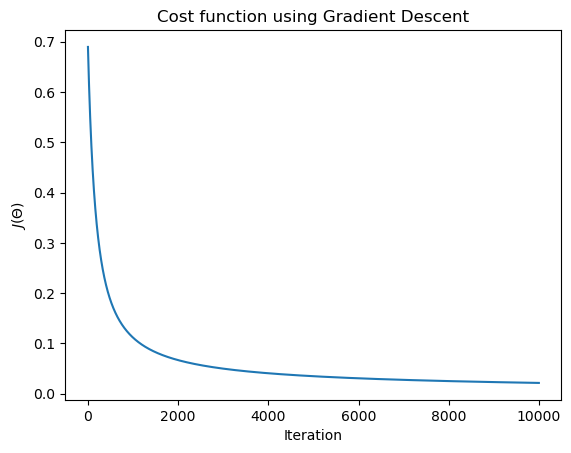

In [52]:
# Plot the cost history 
plt.plot(model.get_cost_history())
plt.xlabel('Iteration')
plt.ylabel('$J(\Theta)$')
plt.title('Cost function using Gradient Descent')
plt.show()

# 4. Evaluate the model
- I will evaluate the model using the testing set.
- I will calculate the accuracy of the model.

In [53]:
def accuracy(y_true, y_pred):

    correct = 0  
    for i in range(len(y_true)):  
        if y_true[i] == y_pred[i]: 
            correct += 1 
    
    result = correct / len(y_true) * 100
    print(f"Accuracy: {result:.2f}%")

accuracy(y_test, predictions_test)

Accuracy: 97.30%


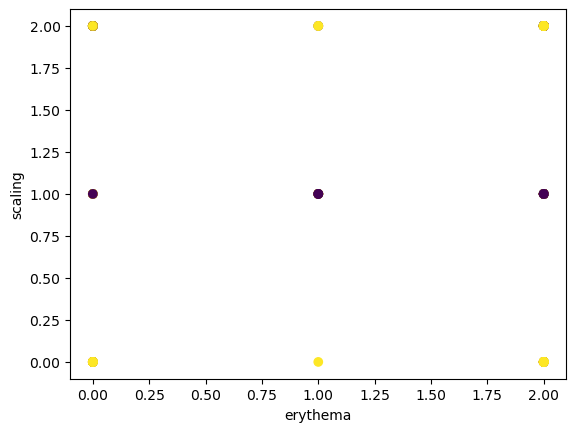

In [54]:
# Plot the erythema and scaling
plt.scatter(dermatology_data['erythema'], dermatology_data['scaling'], c=dermatology_data['class'])
plt.xlabel('erythema')
plt.ylabel('scaling')

plt.show()

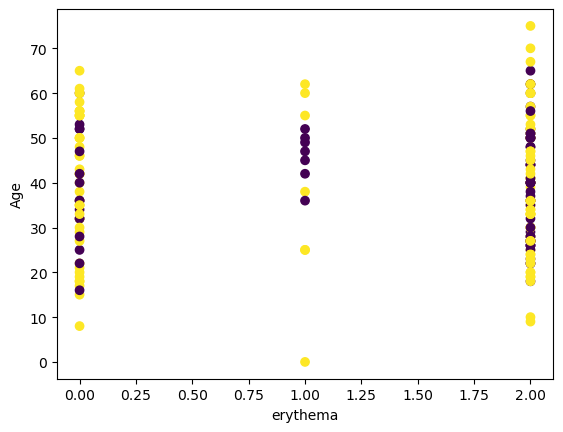

In [55]:
# Plot the koebner phenomenon and scaling
plt.scatter(dermatology_data['erythema'], dermatology_data['Age'], c=dermatology_data['class'])
plt.xlabel('erythema')
plt.ylabel('Age')

plt.show()